In [1]:
import os
os.chdir('..')

from helpers.preprocessing import GexAdtPreprocess
from train import GexAdtTrainer
from evaluate import GexAdtEvaluation

In [2]:
gex_adt_preprocess = GexAdtPreprocess("data/multimodal/GSE194122_openproblems_neurips2021_cite_BMMC_processed.h5ad", 2500)

Reading dataset...


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


Feature selecting GEX...


Trying to set attribute `._uns` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.



New GEX dim: 2500;
New ADT dim: 134;
AnnData dataset's shape: (90261, 2634)



In [3]:
gex_adt_preprocess.dataset.obs

,GEX_n_genes_by_counts,GEX_pct_counts_mt,GEX_size_factors,GEX_phase,ADT_n_antibodies_by_counts,ADT_total_counts,ADT_iso_count,cell_type,batch,ADT_pseudotime_order,...,DonorID,DonorAge,DonorBMI,DonorBloodType,DonorRace,Ethnicity,DonorGender,QCMeds,DonorSmoker,is_train
GCATTAGCATAAGCGG-1-s1d1,893,6.723979,0.356535,G1,115,2828.0,5.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TACAGGTGTTAGAGTA-1-s1d1,2606,8.008829,1.292643,S,137,8819.0,21.0,CD14+ Mono,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
AGGATCTAGGTCTACT-1-s1d1,1867,6.959707,0.970558,G2M,116,4088.0,12.0,Naive CD20+ B IGKC+,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
GTAGAAAGTGACACAG-1-s1d1,2360,6.109234,1.232604,G2M,124,4447.0,9.0,HSC,s1d1,NaN,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
TCCGAAAAGGATCATA-1-s1d1,455,0.294394,0.044585,S,132,12875.0,24.0,Reticulocyte,s1d1,0.735261,...,15078,34,24.8,B-,White,HISPANIC OR LATINO,Male,False,Nonsmoker,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAATCACCACGGAAGT-1-s4d9,2115,4.367301,0.916475,G2M,123,3283.0,10.0,Lymph prog,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,iid_holdout
GCTGGGTGTACGGATG-1-s4d9,1484,4.974369,0.508755,S,124,2695.0,14.0,CD8+ T naive,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
TCGAAGTGTGACAGGT-1-s4d9,801,8.842443,0.232119,G1,132,3590.0,14.0,T reg,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test
GCAGGCTGTTGCATAC-1-s4d9,1630,8.500611,0.549119,G1,133,5432.0,17.0,CD4+ T naive,s4d9,NaN,...,13272,35,31.0,O+,Other Race,HISPANIC OR LATINO,Male,False,Nonsmoker,test


In [4]:
latent_dim = 20
gex_adt_trainer = GexAdtTrainer(
    gex_adt_preprocess, latent_dim, model="shallow"
)

Initializing dataset and dataloader...
The order of labels: ['s1d1', 's1d1', 's1d1', 's1d1', 's1d1', ..., 's4d9', 's4d9', 's4d9', 's4d9', 's4d9']
Length: 90261
Categories (12, object): ['s1d1', 's1d2', 's1d3', 's2d1', ..., 's3d7', 's4d1', 's4d8', 's4d9']

The model: GexAdtMultiModalAutoencoder(
  (gex_encoder): Sequential(
    (0): Linear(in_features=2500, out_features=250, bias=True)
    (1): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=250, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (adt_encoder): Sequential(
    (0): Linear(in_features=134, out_features=50, bias=True)
    (1): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=50, out_features=10, bias=True)
    (4): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [5]:
gex_adt_trainer.train(epochs=20)

Epoch 0 recon loss: 587626.7413077465
Epoch 1 recon loss: 592165.5978301896
Epoch 2 recon loss: 393132.1491567066
Epoch 3 recon loss: 584988.6368732465
Epoch 4 recon loss: 573298.9133435634
Epoch 5 recon loss: 570871.4558843098
Epoch 6 recon loss: 567253.5203886691
Epoch 7 recon loss: 558745.1414080852
Epoch 8 recon loss: 552594.5679435923
Epoch 9 recon loss: 548312.0835860891
Epoch 10 recon loss: 545605.1362814067
Epoch 11 recon loss: 533267.7154370785
Epoch 12 recon loss: 531741.7370787843
Epoch 13 recon loss: 525979.7885011816
Epoch 14 recon loss: 515316.9940747471
Epoch 15 recon loss: 511828.751024581
Epoch 16 recon loss: 499448.4587000388
Epoch 17 recon loss: 499517.3437086683
Epoch 18 recon loss: 488482.2537923731
Epoch 19 recon loss: 481522.4468819982


In [6]:
gex_adt_eval = GexAdtEvaluation(
    gex_adt_trainer, gex_adt_preprocess
)


Latent space type: <class 'numpy.ndarray'>;
GEX encoded shape: torch.Size([90261, 10]);
ADT encoded shape: torch.Size([90261, 10]);
Latent space shape: (90261, 20);



2022-12-14 10:53:35.566688: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.5635642766194263
   celltype_ari  celltype_ami  celltype_homogeneity  celltype_complete  \
0      0.194434      0.490746              0.523794           0.464218   

   batch_ari  batch_ami  batch_homogeneity  batch_complete  
0   0.899998   0.747719           0.693213        0.784925  


... storing 'feature_types' as categorical
... storing 'gene_id' as categorical


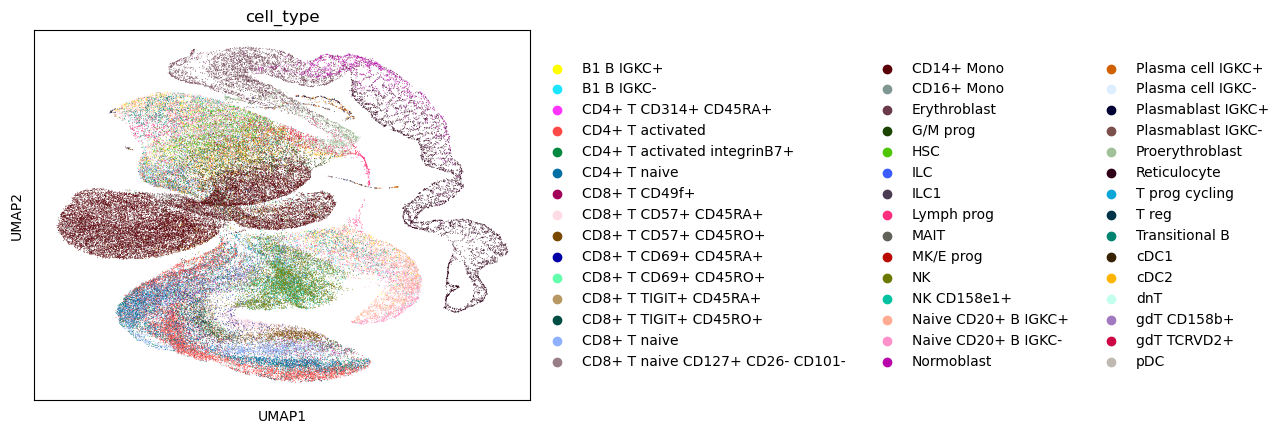

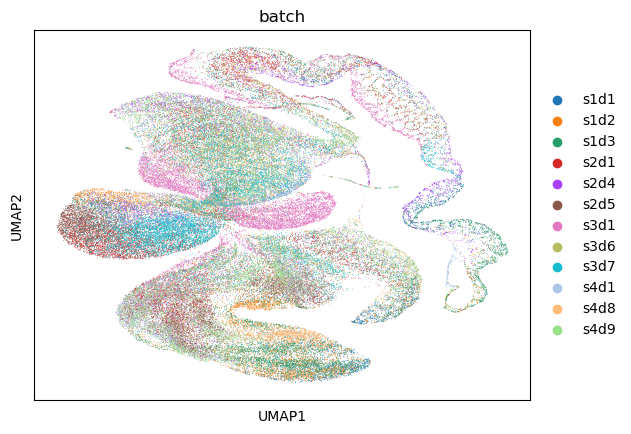

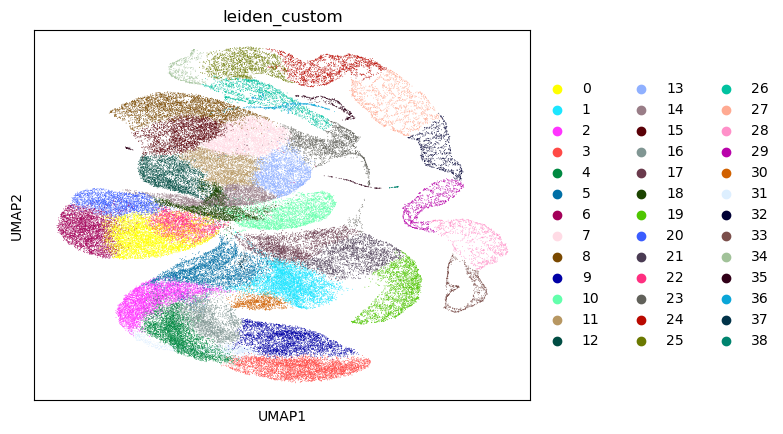

In [7]:
gex_adt_eval.evaluate()